<h3 style="text-align:center">Mohsen Shiri-Ali Chalaki</h3>
<h5 style="text-align:center">Recognizing music style</h5>

<h5 style="text-align:center">Classification method: KNN</h5>

<h3 style="direction:rtl">1- بخش افزودن کتابخانه های موردنیاز</h3>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

<h3 style="direction:rtl">2- بخش فراخوانی داده و نمایش heatmap</h3>

C:\Users\LEGION5 PRO\AppData\Local\Temp\ipykernel_11036\2909858588.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='viridis', square=True)


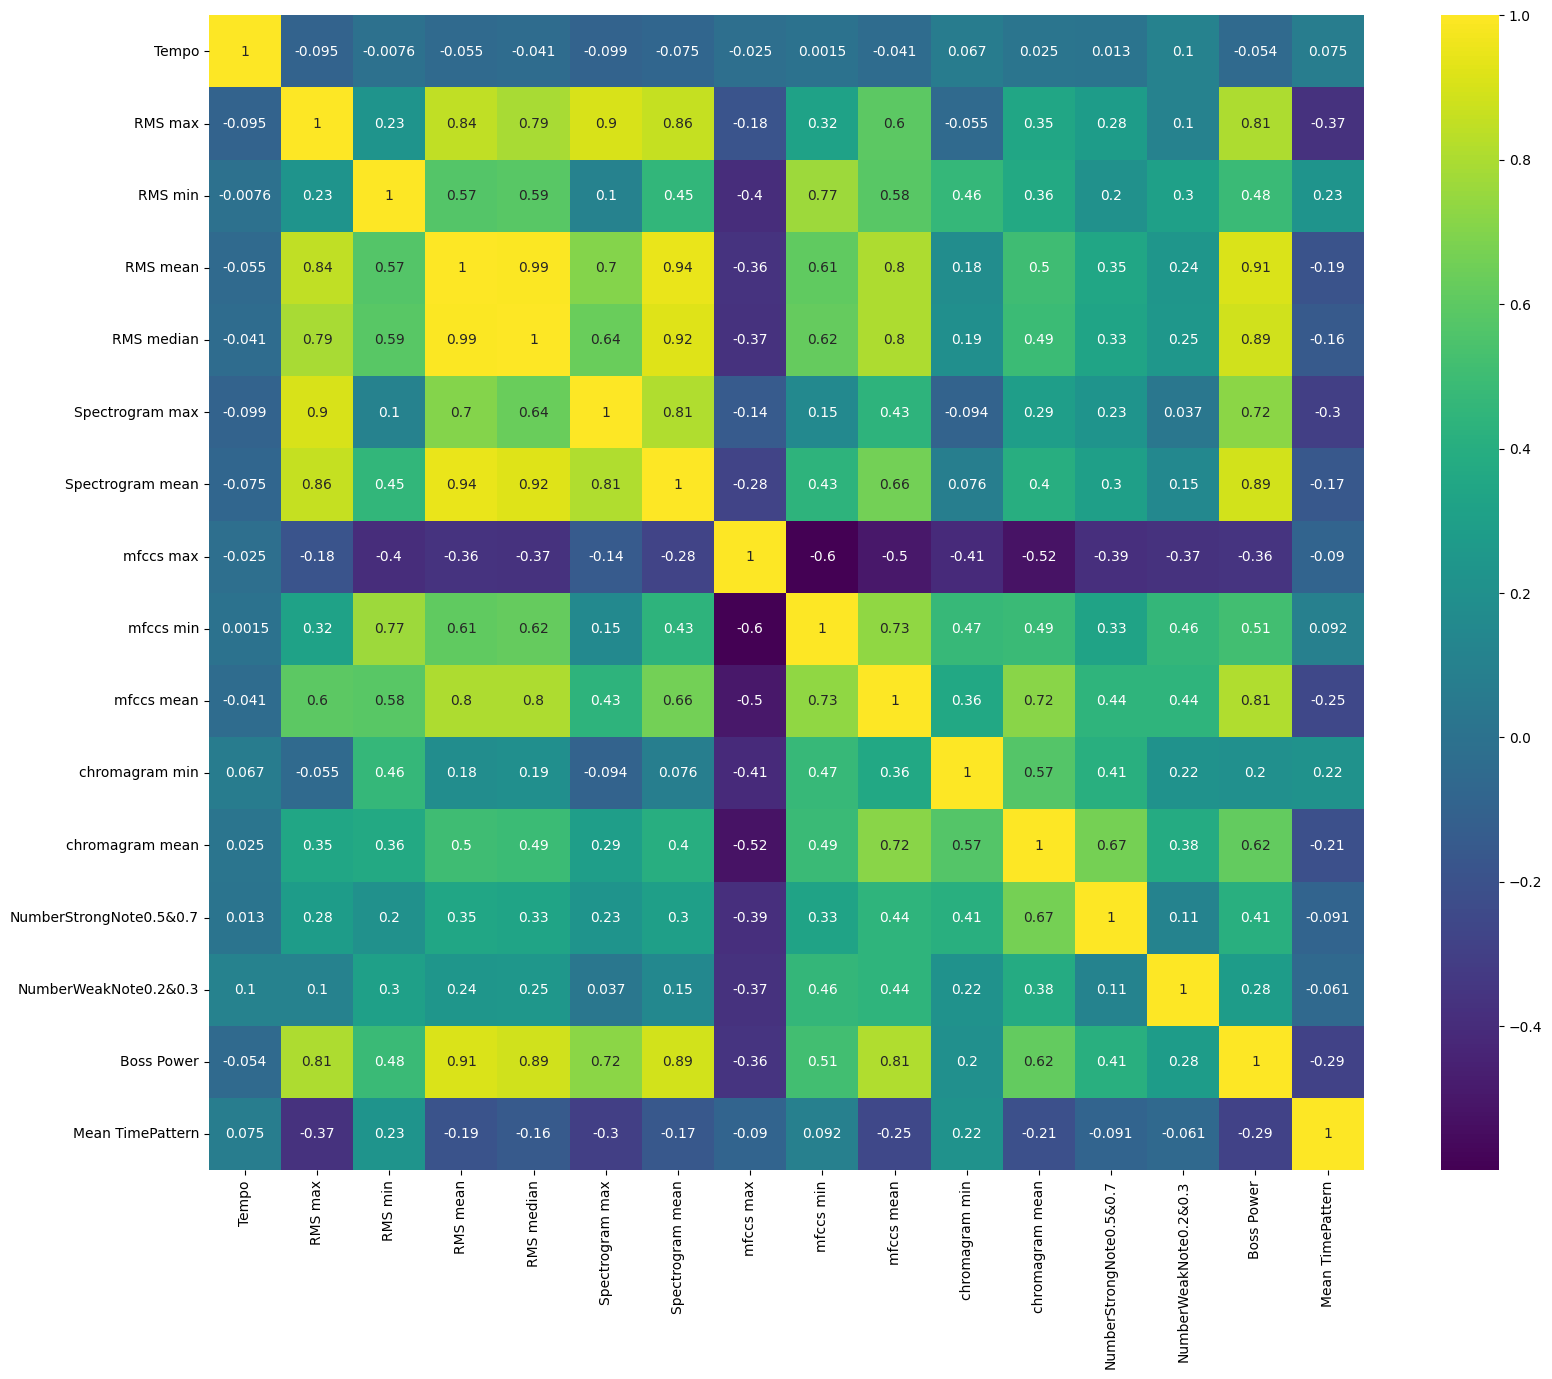

In [20]:
df=pd.read_csv('./MusicDataSet.csv')
df=df.drop("Unnamed: 0",axis=1)
import seaborn as sn
plt.figure(figsize=(20, 15))

sn.heatmap(df.corr(),annot=True,cmap='viridis', square=True)
plt.show()

<h3 style="direction:rtl">3- بخش جداسازی ویژگی و لیبل</h3>

In [21]:
x=df[['Tempo', 'RMS max', 'RMS min', 'RMS mean', 'RMS median',
       'Spectrogram max', 'Spectrogram mean', 'mfccs max', 'mfccs min',
       'mfccs mean', 'chromagram min', 'chromagram mean',
       'NumberStrongNote0.5&0.7', 'NumberWeakNote0.2&0.3', 'Boss Power',
       'Mean TimePattern']].values
y=df["Label"].values

<h3 style="direction:rtl">4- بخش نرمال سازی داده ها</h3>

In [22]:
scaler=preprocessing.Normalizer().fit(x)
X=scaler.transform(x.astype(float))

<h3 style="direction:rtl">5- بخش جداسازی داده آموزشی و داده تست</h3>

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=4)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(799, 16) (200, 16) (799,) (200,)


<h3 style="direction:rtl">6- بخش استفاده از KNN و محاسبه صحت با مقادیر مختلف K</h3>

In [24]:
kn=50
mean_acc=np.zeros(kn-1)
for n in range(1,kn):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    mean_acc[n-1]=metrics.accuracy_score(y_test,neigh.predict(x_test))

<h3 style="direction:rtl">7- بخش نمایش بهترین مقدار صحت و مقدار K</h3>

In [25]:
print(f"Best K: {np.argmax(mean_acc)+1} - Accuracy: {np.max(mean_acc)}")

Best K: 34 - Accuracy: 0.43
